# Data Exploration Notebook

Denise Case May 2025

Click Kernel in upper right / Activate / choose Python Environment - recommended (.venv).

If it asks to install recommended extensions into VS Code, click "Yes". 

In [9]:
# Import from Standard Library
import calendar 
import os
from pathlib import Path

# Import from Third Party Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set directory paths
DIR_THIS_FILE =  Path.cwd()
print(f"Current working directory: {DIR_THIS_FILE}")

DIR_ROOT = DIR_THIS_FILE.parent
print(f"Root directory: {DIR_ROOT}")

DIR_DATA = DIR_ROOT / 'data' / 'raw' 
print(f"Data directory: {DIR_DATA}")

DIR_PLOTS = DIR_ROOT / 'plots' 
print(f"Plots directory: {DIR_PLOTS}")

# Verify the path exists
if os.path.exists(DIR_DATA):
    print(f"Path exists: {DIR_DATA}")
else:
    print("Path not found. Check your path string.")


Current working directory: /home/denisecase/Repos/open-climate-disaster-dashboard/notebooks
Root directory: /home/denisecase/Repos/open-climate-disaster-dashboard
Data directory: /home/denisecase/Repos/open-climate-disaster-dashboard/data/raw
Plots directory: /home/denisecase/Repos/open-climate-disaster-dashboard/plots
Path exists: /home/denisecase/Repos/open-climate-disaster-dashboard/data/raw


## Section 1. Import and Inspect the Data

In [10]:
# Define the path to your data file
data_file = DIR_DATA / 'events-US-1980-2024-Q4.csv'  
# Load the data
df = pd.read_csv(data_file)

# Display the first few rows
df.head()

,Name,Disaster,Begin Date,End Date,CPI-Adjusted Cost,Unadjusted Cost,Deaths
0,Southern Severe Storms and Flooding (April 1980),Flooding,19800410,19800417,2749.4,706.8,7
1,Hurricane Allen (August 1980),Tropical Cyclone,19800807,19800811,2236.2,590.0,13
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,19800601,19801130,40681.2,10020.0,1260
3,Florida Freeze (January 1981),Freeze,19810112,19810114,2076.4,572.0,0
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,19810505,19810510,1409.1,401.4,20


## Section 2. Explore the Data

In [11]:
# Display the shape of the DataFrame
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Display column names
print("Column Names:")
print(df.columns.tolist())

# Display data types and non-null counts
df.info()

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

Dataset contains 403 rows and 7 columns.
Column Names:
['Name', 'Disaster', 'Begin Date', 'End Date', 'CPI-Adjusted Cost', 'Unadjusted Cost', 'Deaths']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               403 non-null    object 
 1   Disaster           403 non-null    object 
 2   Begin Date         403 non-null    int64  
 3   End Date           403 non-null    int64  
 4   CPI-Adjusted Cost  403 non-null    float64
 5   Unadjusted Cost    403 non-null    float64
 6   Deaths             403 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 22.2+ KB

Summary Statistics:
         Begin Date      End Date  CPI-Adjusted Cost  Unadjusted Cost  \
count  4.030000e+02  4.030000e+02         403.000000       403.000000   
mean   2.010085e+07  2.010103e+07        7237.871216      5111.904963   
std    1.

## Section 3. Clean the Data

In [12]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Drop rows with missing values (if appropriate)
df_cleaned = df.dropna()

# Alternatively, fill missing values with a default value
# df_filled = df.fillna(value=0)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicate rows
df_no_duplicates = df.drop_duplicates()




Missing values per column:
 Name                 0
Disaster             0
Begin Date           0
End Date             0
CPI-Adjusted Cost    0
Unadjusted Cost      0
Deaths               0
dtype: int64
Number of duplicate rows: 0


## Section 4. Explore Numeric Columns 

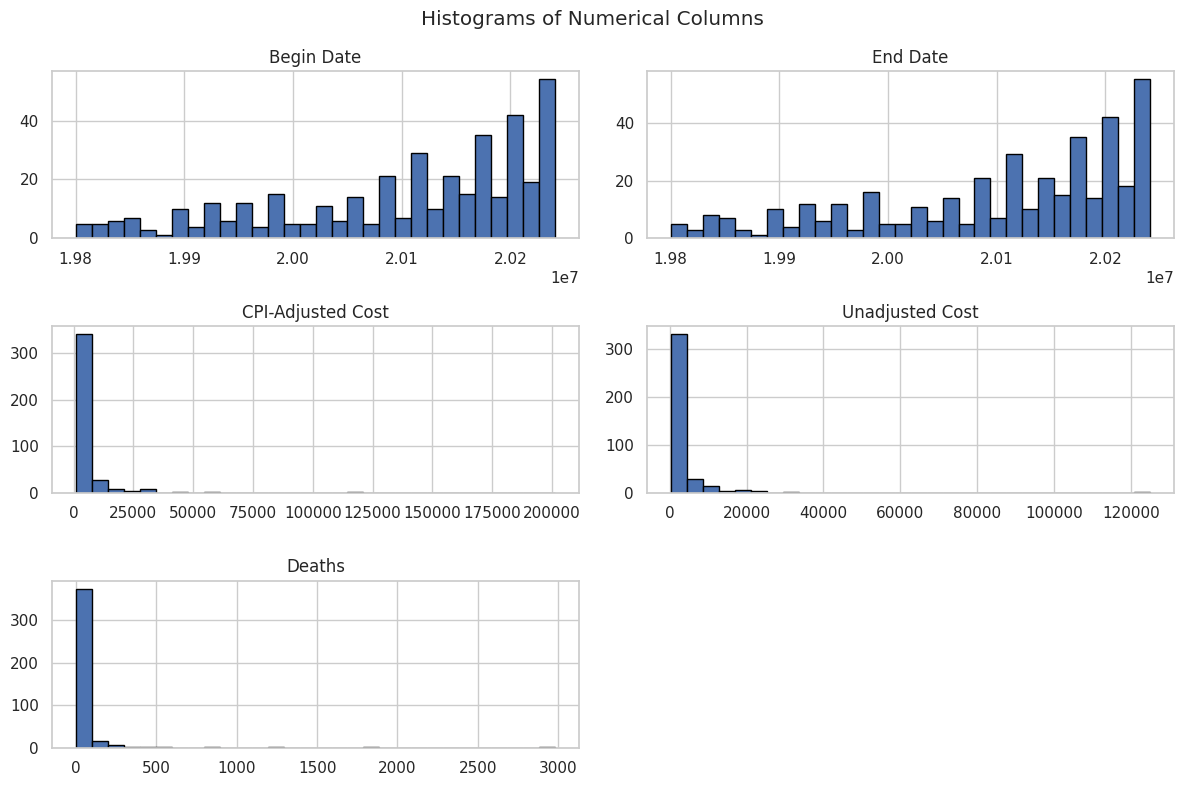

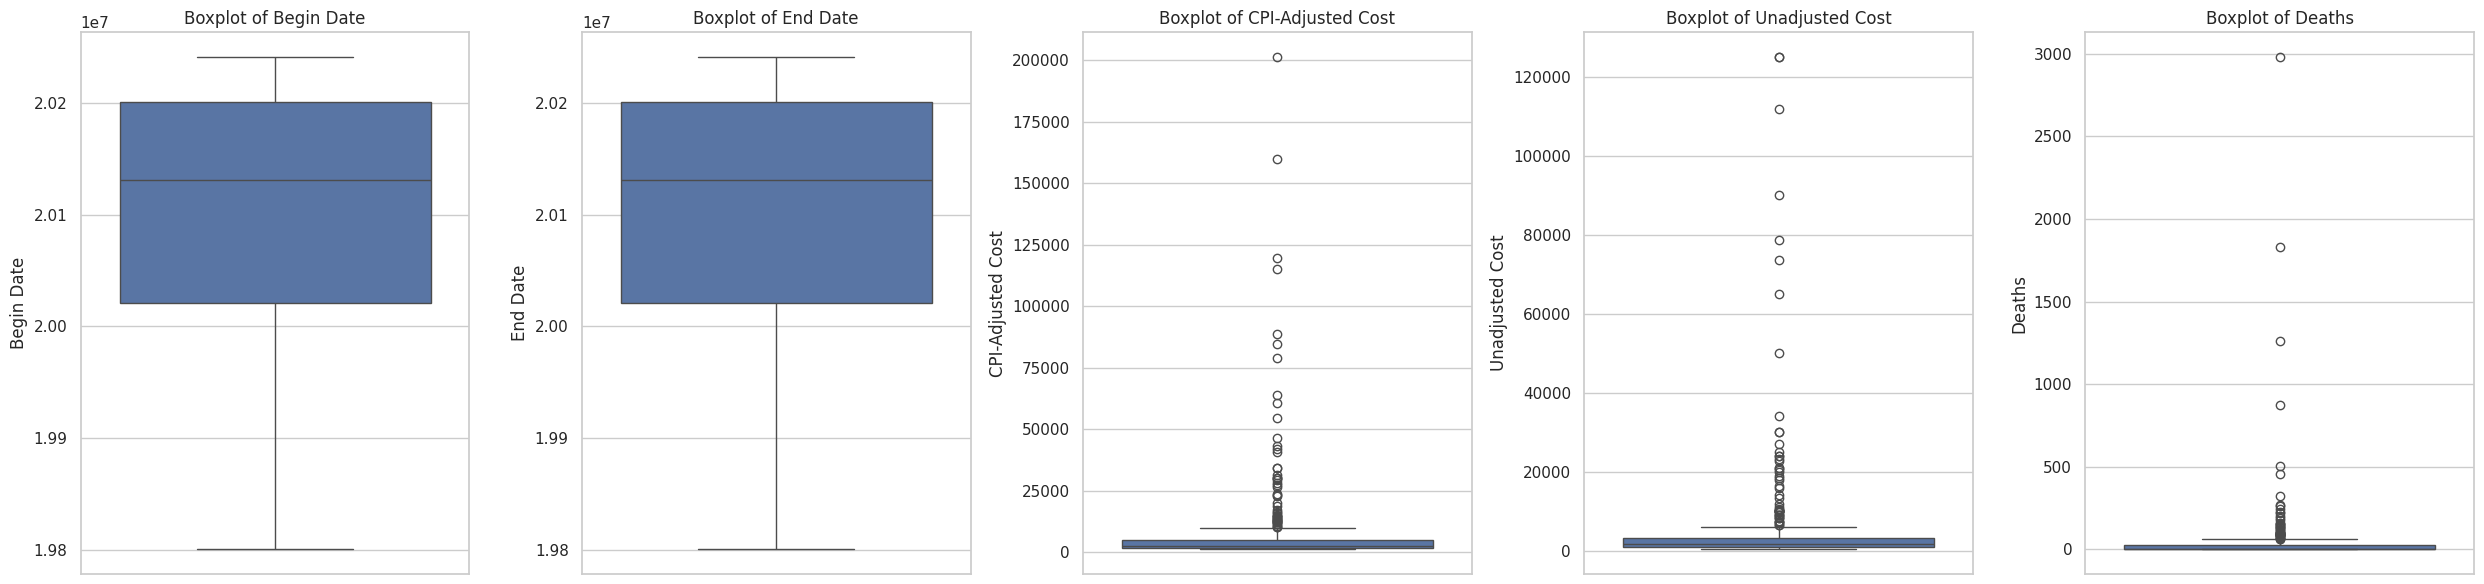

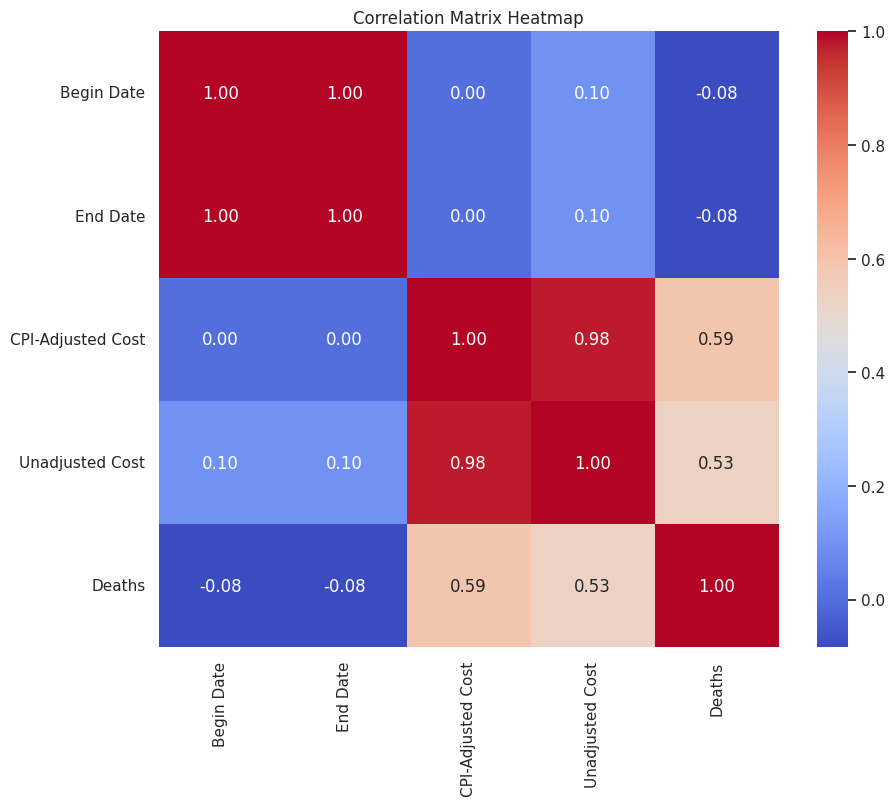

In [13]:

# Histograms for all numerical columns
['Name', 'Disaster', 'Begin Date', 'End Date', 'CPI-Adjusted Cost', 'Unadjusted Cost', 'Deaths', 'Begin_Date', 'Begin_Year', 'Begin_Month']

df.hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histograms of Numerical Columns')
plt.tight_layout()
plt.show()

# Boxplots to identify outliers
numeric_cols = df.select_dtypes(include='number').columns
num_cols = len(numeric_cols)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 6), sharey=False)

# Ensure axes is iterable
if num_cols == 1:
    axes = [axes]

# Plot each boxplot in its own subplot
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_ylabel(col)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

# Correlation matrix - show relationships between numerical variables
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


## Section 5. Feature Engineering

In [14]:
# Add features

# Add BEGIN_DATE column as datetime
df['Begin_Date'] = pd.to_datetime(df['Begin Date'].astype(str), format='%Y%m%d', errors='coerce')
print(df['Begin_Date'].isna().sum())

# Extract Year from 'Begin_Date'
df['Begin_Year'] = df['Begin_Date'].dt.year

# Extract Month from 'Begin_Date'
df['Begin_Month'] = df['Begin_Date'].dt.month

# Add END_DATE column as datetime
df['End_Date'] = pd.to_datetime(df['End Date'].astype(str), format='%Y%m%d', errors='coerce')
print(df['End_Date'].isna().sum())

# Extract Year from 'End_Date'
df['End_Year'] = df['End_Date'].dt.year

# Extract Month from 'End_Date'
df['End_Month'] = df['End_Date'].dt.month

# Convert 'CPI-Adjusted Cost' in millions to billions USD
df['CPI-Adjusted_Cost_B_USD'] = df['CPI-Adjusted Cost'] / 1000.0
df['Unadjusted_Cost_B_USD'] = df['Unadjusted Cost'] / 1000.0

# Display column names
print("Column Names:")
print(df.columns.tolist())

0
0
Column Names:
['Name', 'Disaster', 'Begin Date', 'End Date', 'CPI-Adjusted Cost', 'Unadjusted Cost', 'Deaths', 'Begin_Date', 'Begin_Year', 'Begin_Month', 'End_Date', 'End_Year', 'End_Month', 'CPI-Adjusted_Cost_B_USD', 'Unadjusted_Cost_B_USD']


## Section 6. Visualize Trends

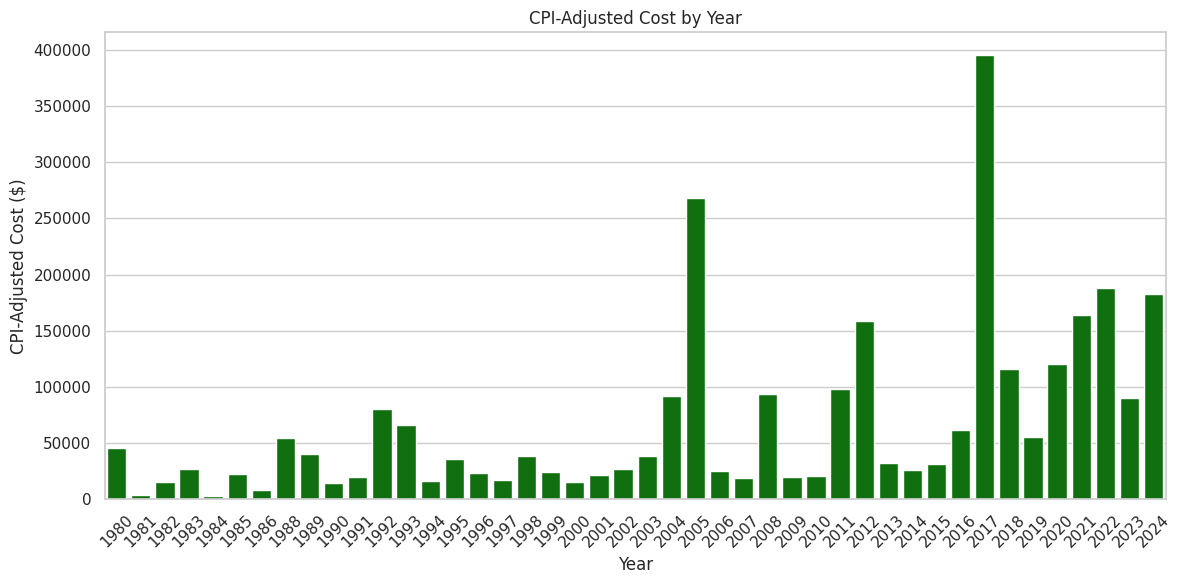

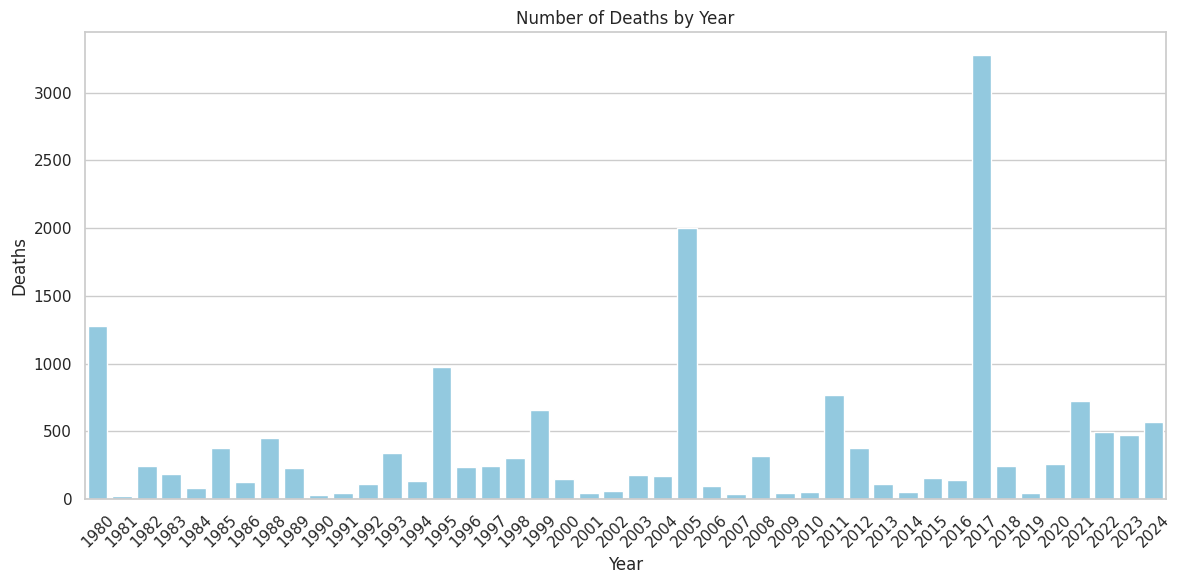

In [15]:

# Aggregate CPI-Adjusted Cost by year
cpi_original_column = 'CPI-Adjusted Cost'
yearly_cost_df = df.groupby('Begin_Year')[cpi_original_column].sum().reset_index()

# Plot CPI-Adjusted Cost by year
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.barplot(data=yearly_cost_df, x='Begin_Year', y=cpi_original_column, color='green')
plt.title('CPI-Adjusted Cost by Year')
plt.xlabel('Year')
plt.ylabel('CPI-Adjusted Cost ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Aggregate Deaths by year
deaths_column = 'Deaths'
yearly_deaths_df = df.groupby('Begin_Year')[deaths_column].sum().reset_index()

# Plot number of deaths over time
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.barplot(data=yearly_deaths_df, x='Begin_Year', y=deaths_column, color='skyblue')
plt.title('Number of Deaths by Year')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Section 7. 1980-2024 USD Billion-Dollar Disaster Year-to-Date Event Cost (CPI-Adjusted)

See <https://www.ncei.noaa.gov/access/billions/>

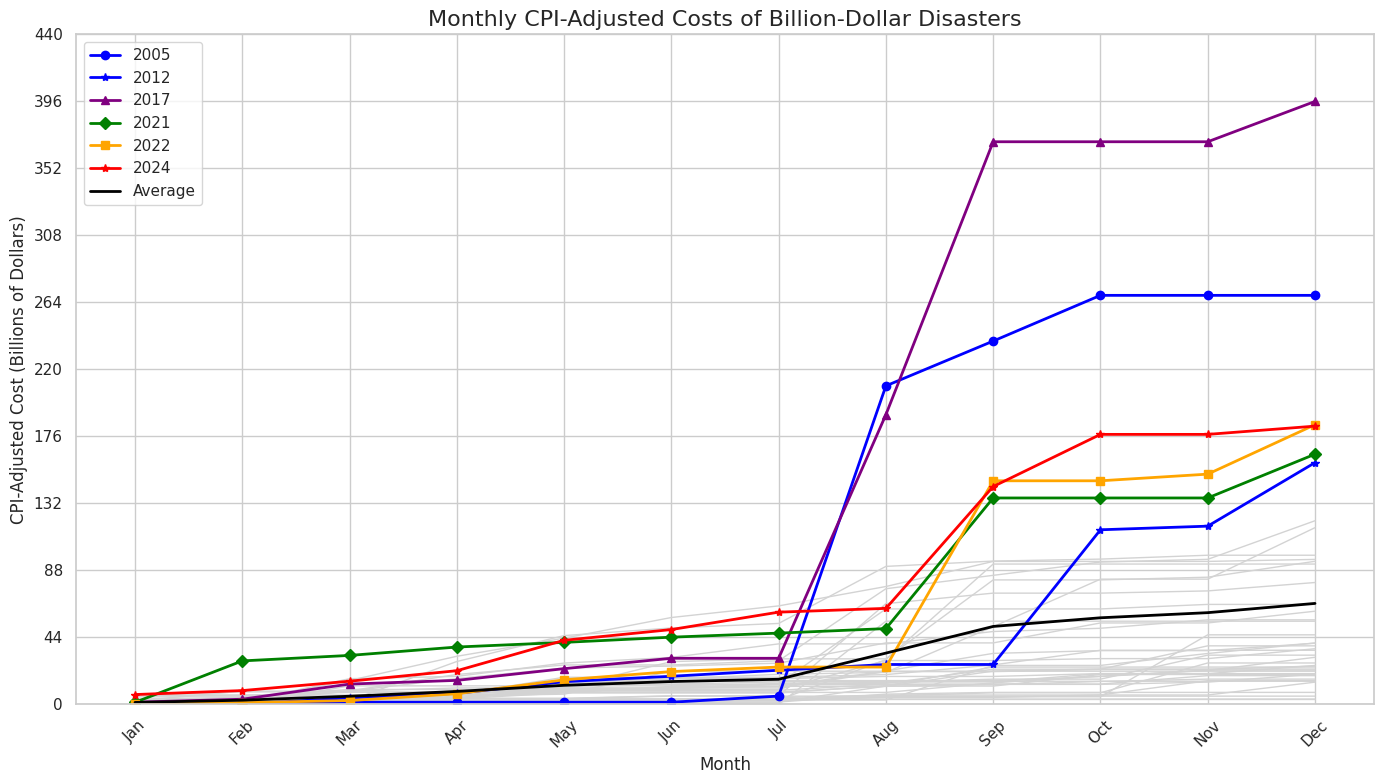

In [16]:

highlight_years = {
    2005: {'color': 'blue', 'marker': 'o', 'linestyle': '--', 'label': '2005'},
    2012: {'color': 'blue', 'marker': '*', 'linestyle': '--', 'label': '2012'},
    2017: {'color': 'purple', 'marker': '^', 'linestyle': '-', 'label': '2017'},
    2021: {'color': 'green', 'marker': 'D', 'linestyle': '-', 'label': '2021'},
    2022: {'color': 'orange', 'marker': 's', 'linestyle': '-', 'label': '2022'},
    2024: {'color': 'red', 'marker': '*', 'linestyle': '-', 'label': '2024'},
}

cpi_billions_column = 'CPI-Adjusted_Cost_B_USD'

# Group by year and month, and sum the costs
df_sorted = df.sort_values(by=['End_Year', 'End_Month'])
monthly_costs_df = df_sorted.groupby(['End_Year', 'End_Month'])[cpi_billions_column].sum().reset_index()
monthly_costs_df_sorted = monthly_costs_df.sort_values(by=['End_Year', 'End_Month'])

# Pivot the data to have months as rows and years as columns:
monthly_costs_pivot = monthly_costs_df_sorted.pivot(index='End_Month', columns='End_Year', values=cpi_billions_column)

# Replace NaNs with 0 for cumulative summation
monthly_costs_pivot.fillna(0, inplace=True)

# Apply cumulative sum across the months for each year
cumulative_costs_df = monthly_costs_pivot.cumsum()

# Width: 14 inches, Height: 8 inches
fig, ax = plt.subplots(figsize=(14, 8))

for year in cumulative_costs_df.columns:
    if year not in highlight_years:
        ax.plot(cumulative_costs_df.index, cumulative_costs_df[year], color='lightgrey', linewidth=1)

for year, style in highlight_years.items():
    if year in cumulative_costs_df.columns:
        ax.plot(
            cumulative_costs_df.index,
            cumulative_costs_df[year],
            color=style['color'],
            marker=style['marker'],
            linewidth=2,
            label=style['label']
        )


# Plot the average line
monthly_avg = cumulative_costs_df.mean(axis=1)
ax.plot(monthly_avg.index, monthly_avg.values, color='black', linewidth=2, label='Average')


# Set the x-axis labels to month names:
ax.set_xticks(range(1, 13))
ax.set_xticklabels(calendar.month_abbr[1:], rotation=45)

# Set the y-axis limits and ticks
max_cost = monthly_costs_pivot.max().max()
y_max = 440 #(int(max_cost / 44) + 1) * 44  # Round up to the next multiple of 44
ax.set_ylim(0, y_max)
ax.set_yticks(range(0, y_max + 1, 44))

# Add labels and title
ax.set_xlabel('Month')
ax.set_ylabel('CPI-Adjusted Cost (Billions of Dollars)')
ax.set_title('Monthly CPI-Adjusted Costs of Billion-Dollar Disasters', fontsize=16)

# Add legend and grid
ax.legend()


plt.tight_layout()
plt.show()
